In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

%matplotlib inline

In [2]:
data_1 = pd.read_csv('googleplaystore.csv')
data_2 = pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
data_1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
data_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data_1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data_1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
data_1['Rating'] = data_1['Rating'].astype('float64')

In [8]:
data_1['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [9]:
data_1['Reviews'] = data_1['Reviews'].map(lambda x: x.rstrip('.0M'))


In [10]:
data_1[data_1['App']=='Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
data_1[data_1['Reviews']=='']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
478,Truth or Dare Pro,DATING,NaN,,20M,50+,Paid,$1.49,Teen,Dating,"September 1, 2017",1.0,4.0 and up
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,,18k,100+,Paid,$2.99,Everyone,Dating,"July 25, 2017",1.0.1,4.0 and up
621,Dating White Girls,DATING,NaN,,3.6M,50+,Free,0,Mature 17+,Dating,"July 20, 2018",1.0,4.0 and up
623,Geeks Dating,DATING,NaN,,13M,50+,Free,0,Mature 17+,Dating,"July 10, 2018",1.0,4.1 and up
627,CAM5678 Video Chat,DATING,NaN,,39M,500+,Free,0,Mature 17+,Dating,"July 13, 2018",5.5.8,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,FQ India,LIFESTYLE,NaN,,8.9M,10+,Free,0,Everyone,Lifestyle,"July 31, 2018",7.2.2,4.1 and up
10774,Miss FQ,NEWS_AND_MAGAZINES,NaN,,36M,10+,Free,0,Everyone,News & Magazines,"April 5, 2018",3.8,4.4 and up
10798,Word Search Tab 1 FR,FAMILY,NaN,,1020k,50+,Paid,$1.04,Everyone,Puzzle,"February 6, 2012",1.1,3.0 and up
10822,PLMGSS FR,PRODUCTIVITY,NaN,,3.1M,10+,Free,0,Everyone,Productivity,"December 1, 2017",1,4.4 and up


In [12]:
data_1['Reviews'] = data_1['Reviews'].replace('','0').astype(object)

In [13]:
data_1['Reviews'] = data_1['Reviews'].apply(lambda x: int(x))

In [14]:
data_1.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.193338,4.146151e+05
std,0.537431,2.892939e+06
min,1.000000,0.000000e+00
25%,4.000000,2.900000e+01
50%,4.300000,1.623000e+03
75%,4.500000,4.384700e+04
max,19.000000,7.815831e+07


Total number of apps in playstore

In [15]:
data_1['App'].count()

10841

Categories of apps

In [16]:
data_1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [17]:
data_1['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [18]:
data_1['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

I'm converting the 0 value to Free assuming it cost no money to download

In [19]:
data_1['Type'] = data_1['Type'].replace('0','Free').astype(object)

In [20]:
# Checking the values again
data_1['Type'].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

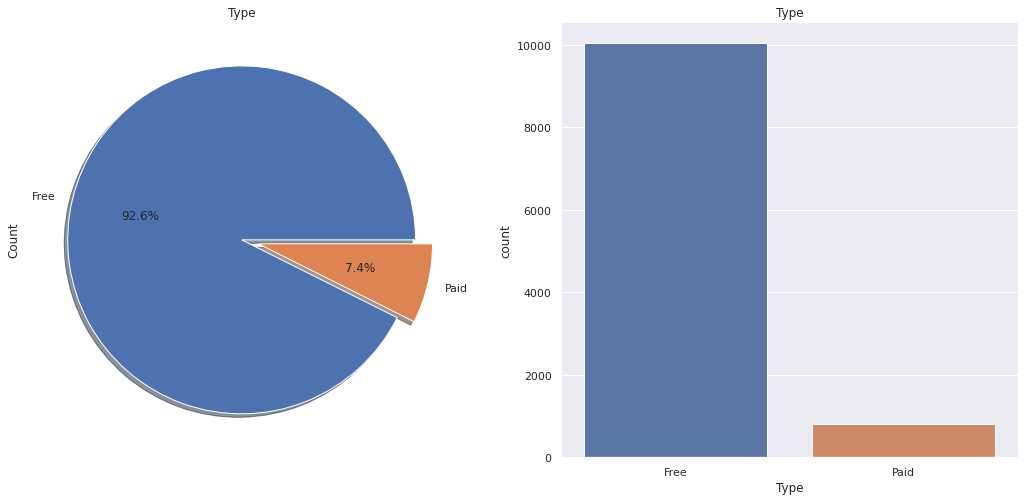

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_1['Type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Type')
ax[0].set_ylabel('Count')
sns.countplot('Type',data=data_1,ax=ax[1],order=data_1['Type'].value_counts().index)
ax[1].set_title('Type')
plt.show()

[(0.0, 5.0)]

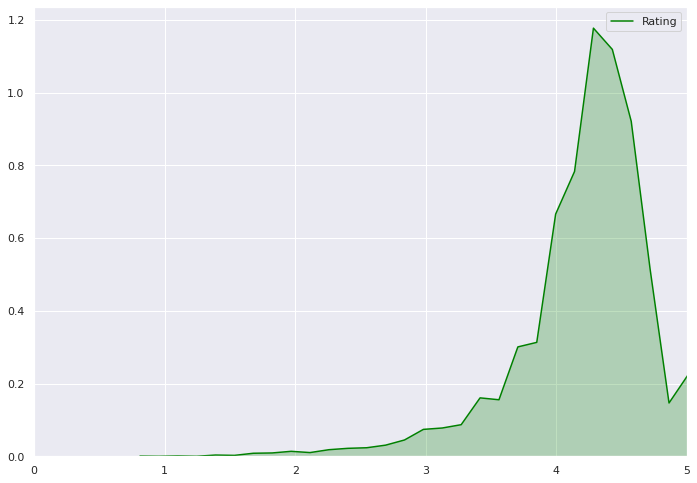

In [33]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data_1['Rating'],color='Green',shade=True)
g.set(xlim=(0,5))

Counting apps for each category

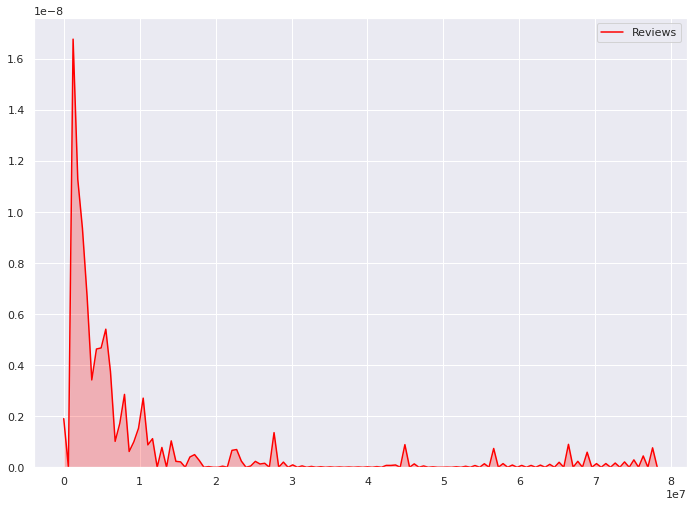

In [24]:
sns.kdeplot(data_1['Reviews'],color='Red',shade=True)

Text(0.5, 1.0, 'Count of app in each category')

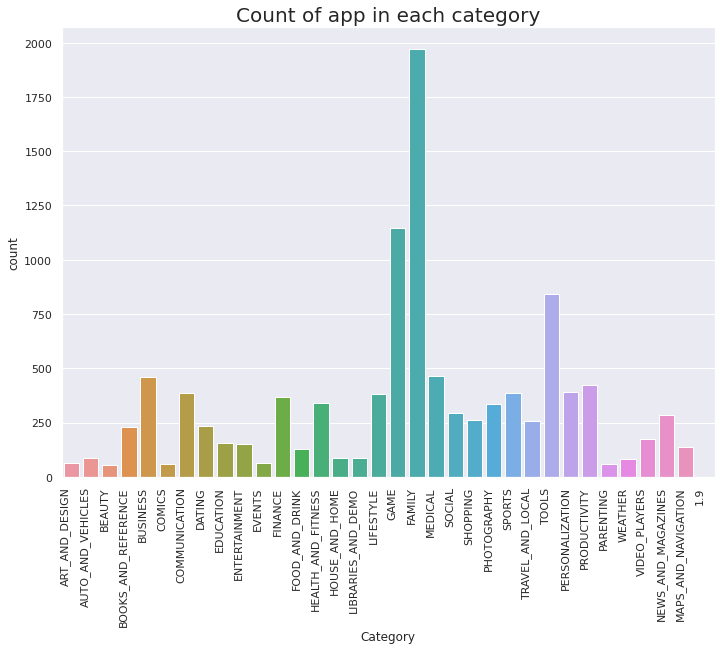

In [25]:
g = sns.countplot(data=data_1,x='Category')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g
plt.title("Count of app in each category",size=20)

Game and Family categories have the most apps

Text(0.5, 1.0, 'Boxplot of Rating vs Category')

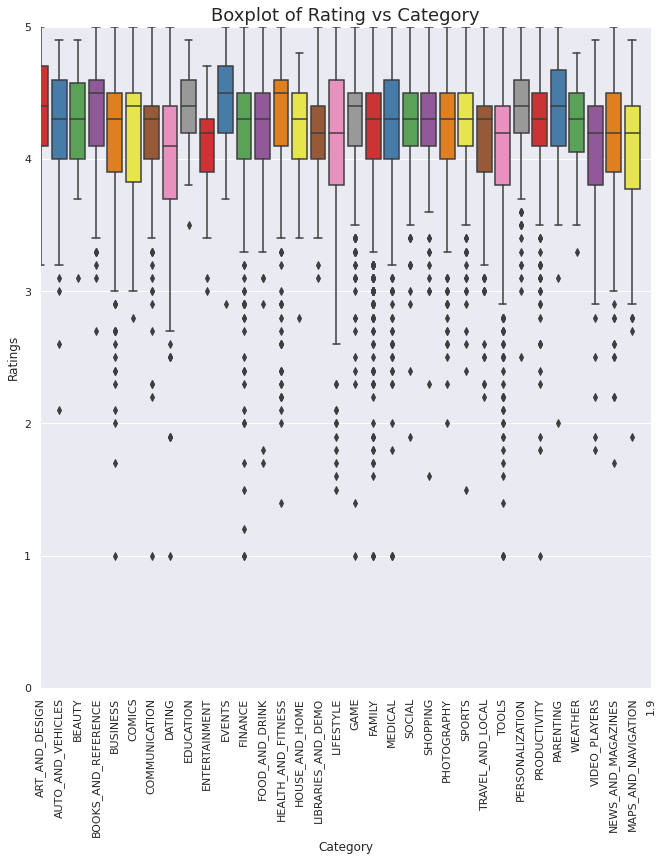

In [32]:
g = sns.catplot(x='Category',y='Rating',data=data_1,kind="box",height=10,palette='Set1')
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set(xticks=range(0,34))
g = g.set_ylabels('Ratings')
g.set(xlim=(0,33))
g.set(ylim=(0,5))
plt.title('Boxplot of Rating vs Category',size=18)